In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_init = pd.read_csv('data.csv', sep=';')
df_init.head()

,Id,Result,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96,Feature_97,Feature_98,Feature_99,Feature_100
0,1,2,2,56.0,12,1,7.0,4.0,0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2,2,2,69.0,19,1,6.0,4.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2,1,66.0,8,1,4.0,4.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2,2,62.0,16,1,NaN,3.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2,2,67.0,30,1,NaN,4.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df = df_init.copy()

target_name = 'Result'
golden_features = ['Feature_3', 'Feature_4', 'Feature_32', 'Feature_35']
feature_names = df.columns.drop([target_name] + golden_features + ['Id']).tolist()

df.fillna(0, inplace=True)

In [4]:
df.describe()

,Id,Result,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96,Feature_97,Feature_98,Feature_99,Feature_100
count,143.00000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,72.00000,1.685315,1.496503,66.594406,12.958042,1.328671,2.664336,2.839161,0.090909,0.755245,...,0.020979,0.090909,0.153846,0.160839,0.083916,0.300699,0.0,0.041958,0.265734,0.0
std,41.42463,0.466023,0.501745,15.666973,8.433563,0.471381,3.126317,0.801850,0.288490,0.431453,...,0.143818,0.288490,0.362069,0.368674,0.278236,1.156945,0.0,0.201198,0.887718,0.0
min,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,36.50000,1.000000,1.000000,56.000000,6.000000,1.000000,0.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,72.00000,2.000000,1.000000,68.000000,12.000000,1.000000,1.000000,3.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,107.50000,2.000000,2.000000,80.000000,18.000000,2.000000,5.000000,3.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
max,143.00000,2.000000,2.000000,97.000000,40.000000,2.000000,12.000000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,0.0,1.000000,9.000000,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Columns: 102 entries, Id to Feature_100
dtypes: float64(84), int64(18)
memory usage: 114.1 KB


In [21]:
X = df[feature_names]
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    shuffle=True,
    test_size=0.2,
    random_state=100,
    stratify=y
)

scaler = StandardScaler()
X = scaler.fit_transform(X)
# LogisticRegression: 0.8
# RidgeClassifier: 0.73
# SGDClassifier: 0.76
# LinearSVC: 0.73
# GradientBoostingClassifier: 0.83

# norm = Normalizer()
# X = norm.fit_transform(X)
# LogisticRegression: 0.69
# RidgeClassifier: 0.71
# SGDClassifier: 0.64
# LinearSVC: 0.66
# GradientBoostingClassifier: 0.8

# minmax = MinMaxScaler()
# X = minmax.fit_transform(X)
# LogisticRegression: 0.8
# RidgeClassifier: 0.8
# SGDClassifier: 0.8
# LinearSVC: 0.78
# GradientBoostingClassifier: 0.82

clf = LogisticRegression()
print(f'LogisticRegression: {round(cross_val_score(clf, X, y, scoring="accuracy", cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0)).mean(),2)}')

clf = RidgeClassifier()
print(f'RidgeClassifier: {round(cross_val_score(clf, X, y, scoring="accuracy", cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0)).mean(),2)}')

clf = SGDClassifier()
print(f'SGDClassifier: {round(cross_val_score(clf, X, y, scoring="accuracy", cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0)).mean(),2)}')

clf = LinearSVC()
print(f'LinearSVC: {round(cross_val_score(clf, X, y, scoring="accuracy", cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0)).mean(),2)}')

clf = GradientBoostingClassifier()
print(f'GradientBoostingClassifier: {round(cross_val_score(clf, X, y, scoring="accuracy", cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0)).mean(),2)}')

LogisticRegression: 0.8
RidgeClassifier: 0.73
SGDClassifier: 0.75
LinearSVC: 0.73
GradientBoostingClassifier: 0.83


In [7]:
print(f'Accuracy on train: {round(cbr_model.score(X_train, y_train), 2)}')
print(f'Accuracy on test: {round(cbr_model.score(X_test, y_test), 2)}')

y_test_pred = cbr_model.predict(X_test)
print(f'\nClassification report: \n{classification_report(y_test, y_test_pred)}')
print(f'\nConfusion matrix:\n {confusion_matrix(y_test, y_test_pred)}')

Accuracy on train: 1.0
Accuracy on test: 0.93

Classification report: 
              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       1.00      0.90      0.95        10

    accuracy                           0.93        15
   macro avg       0.92      0.95      0.93        15
weighted avg       0.94      0.93      0.93        15


Confusion matrix:
 [[5 0]
 [1 9]]


In [ ]:
feature_importances = pd.DataFrame(
    zip(X.columns, cbr_model.get_feature_importance()),
    columns=['feature_name', 'importance']
)

feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances.head(50)

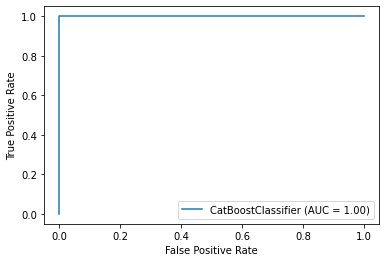

In [11]:
plot_roc_curve(cbr_model, X_test, y_test)  

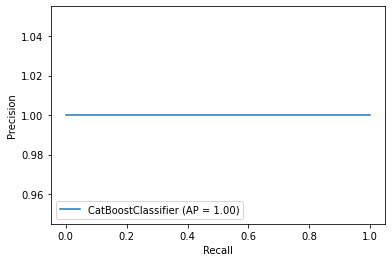

In [13]:
plot_precision_recall_curve(cbr_model, X_test, y_test) 